## EDA FOR MACHINE LEARNING

### Import Libraries

In [334]:
import pandas as pd
import time
import string
import matplotlib.pyplot as plt

### EDA STEAM GAMES

In [335]:
df_steam_games = pd.read_parquet('GZIP/df_steam_games.gzip')
df_steam_games.head(1)

,Id,App_Name,Price,Release_Year,Release_Date,Genres,Early_Access,Specs,Developer,Publisher
88310,761140,Lost Summoner Kitty,4.99,2018,2018-04-01,"Action, Casual, Indie, Simulation, Strategy",False,Single-player,Kotoshiro,Kotoshiro


In [336]:
# Check if there's any Nan value in any column
rows_with_nan = df_steam_games[df_steam_games.isna().any(axis=1)]
print(rows_with_nan)
# Check duplicated rows
duplicated_rows = df_steam_games[df_steam_games.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [Id, App_Name, Price, Release_Year, Release_Date, Genres, Early_Access, Specs, Developer, Publisher]
Index: []
Empty DataFrame
Columns: [Id, App_Name, Price, Release_Year, Release_Date, Genres, Early_Access, Specs, Developer, Publisher]
Index: []


In [337]:
# Explode genres to get each single genre
df_steam_games['Genres'] = df_steam_games['Genres'].str.split(',')
df_steam_games = df_steam_games.explode('Genres')

In [338]:
# We see that we got leading spaces in some Genres ('  Casual'), we'll clear
# that.
unique_genres = df_steam_games['Genres'].unique()
unique_genres

array(['Action', '  Casual', '  Indie', '  Simulation', '  Strategy',
       'Free to Play', '  RPG', '  Adventure', '  Sports', 'Casual',
       'Adventure', 'Strategy', 'Racing', 'RPG', 'nan', 'Simulation',
       'Indie', '  Racing', '  Free to Play', '  Massively Multiplayer',
       'Animation &amp; Modeling', '  Web Publishing',
       'Design &amp; Illustration', '  Early Access', '  Education',
       '  Utilities', '  Design &amp; Illustration', 'Sports',
       '  Software Training', 'Utilities', '  Video Production',
       '  Photo Editing', 'Education', 'Photo Editing',
       'Massively Multiplayer', 'Audio Production', '  Audio Production',
       '  Animation &amp; Modeling', 'Early Access', 'Video Production',
       '  Action'], dtype=object)

In [339]:
# Remove leading whitespaces and convert to lowercase
df_steam_games['Genres'] = df_steam_games['Genres'].str.strip().str.lower()
df_steam_games

,Id,App_Name,Price,Release_Year,Release_Date,Genres,Early_Access,Specs,Developer,Publisher
88310,761140,Lost Summoner Kitty,4.99,2018,2018-04-01,action,False,Single-player,Kotoshiro,Kotoshiro
88310,761140,Lost Summoner Kitty,4.99,2018,2018-04-01,casual,False,Single-player,Kotoshiro,Kotoshiro
88310,761140,Lost Summoner Kitty,4.99,2018,2018-04-01,indie,False,Single-player,Kotoshiro,Kotoshiro
88310,761140,Lost Summoner Kitty,4.99,2018,2018-04-01,simulation,False,Single-player,Kotoshiro,Kotoshiro
88310,761140,Lost Summoner Kitty,4.99,2018,2018-04-01,strategy,False,Single-player,Kotoshiro,Kotoshiro
...,...,...,...,...,...,...,...,...,...,...
120442,610660,Russian Roads,1.99,2018,2018-04-01,indie,False,"Single-player, Steam Achievements, Steam Tradi...",Laush Dmitriy Sergeevich,Laush Studio
120442,610660,Russian Roads,1.99,2018,2018-04-01,racing,False,"Single-player, Steam Achievements, Steam Tradi...",Laush Dmitriy Sergeevich,Laush Studio
120442,610660,Russian Roads,1.99,2018,2018-04-01,simulation,False,"Single-player, Steam Achievements, Steam Tradi...",Laush Dmitriy Sergeevich,Laush Studio
120443,658870,Exit Directions,4.99,2017,2017-02-09,casual,False,"Single-player, Steam Achievements, Steam Cloud",Xropistevns,Sixnails


In [340]:
# Remove rows with 'nan' in the Genres column
df_steam_games = df_steam_games[df_steam_games['Genres'] != 'nan']
# Display the modified dataframe
df_steam_games

,Id,App_Name,Price,Release_Year,Release_Date,Genres,Early_Access,Specs,Developer,Publisher
88310,761140,Lost Summoner Kitty,4.99,2018,2018-04-01,action,False,Single-player,Kotoshiro,Kotoshiro
88310,761140,Lost Summoner Kitty,4.99,2018,2018-04-01,casual,False,Single-player,Kotoshiro,Kotoshiro
88310,761140,Lost Summoner Kitty,4.99,2018,2018-04-01,indie,False,Single-player,Kotoshiro,Kotoshiro
88310,761140,Lost Summoner Kitty,4.99,2018,2018-04-01,simulation,False,Single-player,Kotoshiro,Kotoshiro
88310,761140,Lost Summoner Kitty,4.99,2018,2018-04-01,strategy,False,Single-player,Kotoshiro,Kotoshiro
...,...,...,...,...,...,...,...,...,...,...
120442,610660,Russian Roads,1.99,2018,2018-04-01,indie,False,"Single-player, Steam Achievements, Steam Tradi...",Laush Dmitriy Sergeevich,Laush Studio
120442,610660,Russian Roads,1.99,2018,2018-04-01,racing,False,"Single-player, Steam Achievements, Steam Tradi...",Laush Dmitriy Sergeevich,Laush Studio
120442,610660,Russian Roads,1.99,2018,2018-04-01,simulation,False,"Single-player, Steam Achievements, Steam Tradi...",Laush Dmitriy Sergeevich,Laush Studio
120443,658870,Exit Directions,4.99,2017,2017-02-09,casual,False,"Single-player, Steam Achievements, Steam Cloud",Xropistevns,Sixnails


In [341]:
# Explode the Specs column
df_steam_games.loc[:, 'Specs'] = df_steam_games['Specs'].str.strip().str.lower().str.split(', ')
df_steam_games = df_steam_games.explode('Specs')
# Display the modified dataframe
df_steam_games.head(1)

,Id,App_Name,Price,Release_Year,Release_Date,Genres,Early_Access,Specs,Developer,Publisher
88310,761140,Lost Summoner Kitty,4.99,2018,2018-04-01,action,False,single-player,Kotoshiro,Kotoshiro


In [342]:
# Remove column that's not needed for the recommendation system
df_steam_games = df_steam_games.drop('Publisher', axis=1) # Not necessary
df_steam_games = df_steam_games.drop('Release_Date', axis=1) # Not necessary
df_steam_games

,Id,App_Name,Price,Release_Year,Genres,Early_Access,Specs,Developer
88310,761140,Lost Summoner Kitty,4.99,2018,action,False,single-player,Kotoshiro
88310,761140,Lost Summoner Kitty,4.99,2018,casual,False,single-player,Kotoshiro
88310,761140,Lost Summoner Kitty,4.99,2018,indie,False,single-player,Kotoshiro
88310,761140,Lost Summoner Kitty,4.99,2018,simulation,False,single-player,Kotoshiro
88310,761140,Lost Summoner Kitty,4.99,2018,strategy,False,single-player,Kotoshiro
...,...,...,...,...,...,...,...,...
120443,658870,Exit Directions,4.99,2017,casual,False,steam achievements,Xropistevns
120443,658870,Exit Directions,4.99,2017,casual,False,steam cloud,Xropistevns
120443,658870,Exit Directions,4.99,2017,indie,False,single-player,Xropistevns
120443,658870,Exit Directions,4.99,2017,indie,False,steam achievements,Xropistevns


In [343]:
df_steam_games.to_parquet('ML_data/EDA_steam_games.gzip', compression='gzip')

### EDA USER REVIEWS

In [344]:
# Load user_revs dataframe
df_user_reviews = pd.read_parquet('GZIP/df_user_revs.gzip')
df_user_reviews.head(1)

,User_Id,Posted,Item_Id,Recommend,Year,Sentiment_Score
0,76561197970982479,2011-11-05,1250,True,2011,2


In [345]:
# Check if there's any Nan value in any column
rows_with_nan = df_user_reviews[df_user_reviews.isna().any(axis=1)]
print(rows_with_nan)
# Check duplicated rows
duplicated_rows = df_user_reviews[df_user_reviews.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [User_Id, Posted, Item_Id, Recommend, Year, Sentiment_Score]
Index: []
                 User_Id      Posted Item_Id  Recommend  Year  Sentiment_Score
456           bokkkbokkk  2015-09-24  346110       True  2015                2
1182          ImSeriouss  2014-01-10  218620       True  2014                2
1182          ImSeriouss  2014-01-10  105600       True  2014                2
1182          ImSeriouss  2014-12-17     570       True  2014                2
1182          ImSeriouss  2014-01-13  211820       True  2014                2
...                  ...         ...     ...        ...   ...              ...
17916        yolofaceguy  2014-09-02  261030       True  2014                0
18028  76561198075591109  2013-12-26  242570       True  2013                2
18234  76561198092022514  2014-08-17  261820       True  2014                0
18234  76561198092022514  2014-02-17  224260       True  2014                2
18309     SuchGayMuchWow  2015-07-1

In [346]:
# Delete duplicates
df_user_reviews.drop_duplicates(inplace=True)

In [347]:
# Check if there's any Nan value in any column
rows_with_nan = df_user_reviews[df_user_reviews.isna().any(axis=1)]
print(rows_with_nan)
# Check duplicated rows
duplicated_rows = df_user_reviews[df_user_reviews.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [User_Id, Posted, Item_Id, Recommend, Year, Sentiment_Score]
Index: []
Empty DataFrame
Columns: [User_Id, Posted, Item_Id, Recommend, Year, Sentiment_Score]
Index: []


In [348]:
df_user_reviews.head(1)

,User_Id,Posted,Item_Id,Recommend,Year,Sentiment_Score
0,76561197970982479,2011-11-05,1250,True,2011,2


In [349]:
# Drops Posted, and just leave the year
df_user_reviews.drop(["Posted"], axis=1, inplace= True)
df_user_reviews.head(1)

,User_Id,Item_Id,Recommend,Year,Sentiment_Score
0,76561197970982479,1250,True,2011,2


In [350]:
df_user_reviews.to_parquet('ML_data/EDA_user_reviews.gzip', compression='gzip')

### EDA USER ITEMS

In [351]:
# Load user_items dataframe
df_user_items = pd.read_parquet('GZIP/user_items.gzip')
df_user_items.head(1)

,Item_Id,Item_Name,Playtime_Forever,Playtime_2Weeks,User_Id,Steam_Id
0,10,Counter-Strike,6.0,0.0,76561197970982479,76561197970982479


In [352]:
# Check if there's any Nan value in any column
rows_with_nan = df_user_items[df_user_items.isna().any(axis=1)]
print(rows_with_nan)
# Check duplicated rows
duplicated_rows = df_user_items[df_user_items.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [Item_Id, Item_Name, Playtime_Forever, Playtime_2Weeks, User_Id, Steam_Id]
Index: []
      Item_Id                         Item_Name  Playtime_Forever  \
1732       20             Team Fortress Classic               5.0   
1732       50         Half-Life: Opposing Force               0.0   
1732       70                         Half-Life               0.0   
1732      130             Half-Life: Blue Shift               0.0   
1732      220                       Half-Life 2             198.0   
...       ...                               ...               ...   
73424  213670  South Park™: The Stick of Truth™             725.0   
73424  221910               The Stanley Parable              53.0   
73424  261030      The Walking Dead: Season Two             253.0   
73424  273110     Counter-Strike Nexon: Zombies               0.0   
73424     730  Counter-Strike: Global Offensive               0.0   

       Playtime_2Weeks            User_Id           Steam_Id 

In [353]:
# Delete duplicated rows
df_user_items.drop_duplicates(inplace=True)

In [354]:
# View DF
df_user_items.head(1)

,Item_Id,Item_Name,Playtime_Forever,Playtime_2Weeks,User_Id,Steam_Id
0,10,Counter-Strike,6.0,0.0,76561197970982479,76561197970982479


In [355]:
# Drop no needed columns
df_user_items = df_user_items.drop(['Playtime_2Weeks', 'Steam_Id'], axis=1)

In [356]:
df_user_items.head(1)

,Item_Id,Item_Name,Playtime_Forever,User_Id
0,10,Counter-Strike,6.0,76561197970982479


In [357]:
# Sort By Id
df_user_items = df_user_items.sort_values(by='User_Id')
df_user_items.head(3)

,Item_Id,Item_Name,Playtime_Forever,User_Id
17973,200210,Realm of the Mad God,166.0,--000--
17973,263760,Turbo Dismount,244.0,--000--
17973,233190,Final Exam,193.0,--000--


In [358]:
df_user_items.to_parquet('ML_data/EDA_user_items.gzip', compression='gzip')

### EDA STEAM GAMES ANALYSIS

In [359]:
df_EDA_steam = pd.read_parquet('ML_data/EDA_steam_games.gzip')

In [360]:
# Info about prices
df_EDA_steam['Price'].info()

<class 'pandas.core.series.Series'>
Index: 116160 entries, 88310 to 120443
Series name: Price
Non-Null Count   Dtype  
--------------   -----  
116160 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [361]:
# Since there are string values, I will convert them to 0, assuming they represent free versions.
# Replace 'Free To Play' with 0 in the 'price' column
df_EDA_steam.loc[df_EDA_steam['Price'] == 'Free To Play', 'Price'] = 0
# List of values to replace
values_to_replace = ['Free Demo', 'Play for Free!', 'Free','Install Theme', 'Install Now', 'Free Mod', 'Install Theme', 'Third-party', 'Play Now', 'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Free to Try', 'Free to Use', 'Play WARMACHINE: Tactics Demo']
# Replace the values in the 'price' column with 0
df_EDA_steam['Price'].replace(values_to_replace, 0, inplace=True)


In [362]:
# Check all prices
df_EDA_steam['Price'].unique()

array([4.9900e+00, 0.0000e+00, 9.9000e-01, 3.9900e+00, 9.9900e+00,
       1.8990e+01, 2.9990e+01, 1.0990e+01, 2.9900e+00, 1.5900e+00,
       1.4990e+01, 1.9900e+00, 5.9990e+01, 8.9900e+00, 6.9900e+00,
       7.4900e+00, 1.2990e+01, 5.9900e+00, 7.9900e+00, 1.9990e+01,
       1.7990e+01, 6.1990e+01, 3.9990e+01, 3.4900e+00, 1.1990e+01,
       9.9990e+01, 1.4950e+01, 1.3990e+01, 2.4900e+00, 1.6990e+01,
       2.4990e+01, 1.3980e+01, 4.9990e+01, 3.4990e+01, 1.3992e+02,
       4.2900e+00, 6.4990e+01, 7.4990e+01, 8.9990e+01, 1.2900e+00,
       4.4990e+01, 2.3990e+01, 1.5990e+01, 1.9500e+00, 6.9990e+01,
       2.6990e+01, 3.9999e+02, 1.4999e+02, 2.0000e+01, 4.0000e+01,
       7.9990e+01, 5.4990e+01, 1.1999e+02, 3.8850e+01, 7.1700e+01,
       5.4900e+00, 1.5000e+01, 2.7490e+01, 2.2990e+01, 4.9999e+02,
       1.6060e+01, 4.6800e+00, 1.3140e+02, 3.6990e+01, 1.7224e+02,
       2.4999e+02, 2.9700e+00, 1.0000e+01, 3.0000e+01, 3.1990e+01,
       2.7990e+01, 1.1150e+01, 4.9000e+01, 1.9900e+02, 9.9000e

In [363]:
# Use value_counts to count the frequency of each unique value in 'Price'
value_counts = df_EDA_steam['Price'].value_counts()
# Print the result
print(value_counts)
print(value_counts.head(10))

Price
4.99      16062
2.99      15094
9.99      13592
0.99       9445
1.99       8938
          ...  
199.00        1
49.00         1
119.99        1
14.95         1
4.29          1
Name: count, Length: 87, dtype: int64
Price
4.99     16062
2.99     15094
9.99     13592
0.99      9445
1.99      8938
0.00      7567
14.99     6687
3.99      6535
19.99     6213
7.99      4367
Name: count, dtype: int64


In [364]:
# Calculate the first quartile (Q1)
q1 = df_EDA_steam['Price'].quantile(0.25)
# Calculate the median (Q2)
q2 = df_EDA_steam['Price'].quantile(0.5)
# Calculate the third quartile (Q3)
q3 = df_EDA_steam['Price'].quantile(0.75)
print("First Quartile (Q1):", q1)
print("Median (Q2):", q2)
print("Third Quartile (Q3):", q3)

First Quartile (Q1): 2.99
Median (Q2): 4.99
Third Quartile (Q3): 9.99


In [365]:
# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = df_EDA_steam['Price'].quantile(0.25)
Q3 = df_EDA_steam['Price'].quantile(0.75)
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
# Calculate the limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
# Identify outliers
outliers = df_EDA_steam[(df_EDA_steam['Price'] < lower_limit) | (df_EDA_steam['Price'] > upper_limit)]
# Print outliers
print("Outliers:")
print(outliers['Price'].unique())


Outliers:
[ 29.99  59.99  61.99  39.99  99.99  24.99  49.99  34.99 139.92  64.99
  74.99  89.99  44.99  23.99  69.99  26.99 399.99 149.99  40.    79.99
  54.99 119.99  38.85  71.7   27.49  22.99 499.99 131.4   36.99 172.24
 249.99  30.    31.99  27.99  49.   199.    99.    41.99  23.96 129.99
  59.95 160.91]


In [366]:
# Define a function to map price ranges
def assign_range(price):
    if price == 0:
        return 0
    elif 0 < price < 3:
        return 1
    elif 3 <= price < 7:
        return 2
    elif 7 <= price < 15:
        return 3
    elif 15 <= price < 30:
        return 4
    elif 30 <= price < 60:
        return 5
    else:
        return 6
# Apply the function to the 'price' column and create a new column 'price_range'
df_EDA_steam['Price_range'] = df_EDA_steam['Price'].apply(assign_range)
df_EDA_steam.head(1)

,Id,App_Name,Price,Release_Year,Genres,Early_Access,Specs,Developer,Price_range
88310,761140,Lost Summoner Kitty,4.99,2018,action,False,single-player,Kotoshiro,2


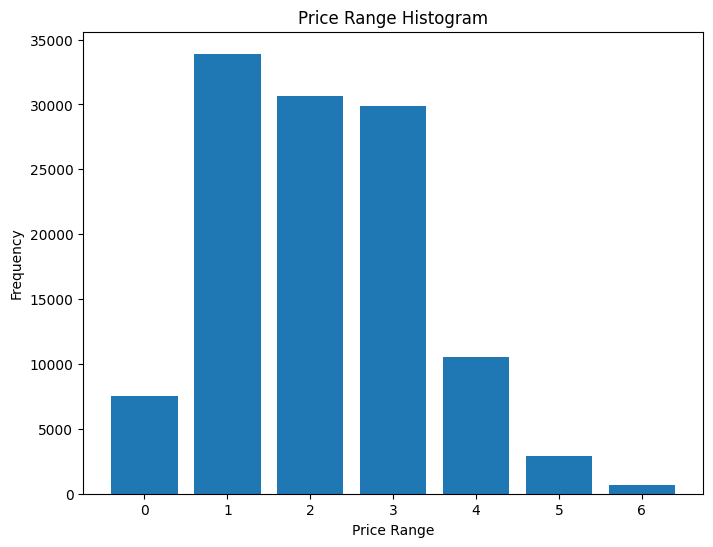

In [367]:
plt.figure(figsize=(8, 6))  # Figure size
# Create a histogram of the 'price_range' column
plt.hist(df_EDA_steam['Price_range'], bins=[0, 1, 2, 3, 4, 5, 6, 7], rwidth=0.8, align='left')
# Labels and title configuration
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.title('Price Range Histogram')
# X-axis tick labels
plt.xticks(range(7), ['0', '1', '2', '3', '4', '5', '6'])
# Show the plot
plt.show()

In [368]:
df_EDA_steam['Release_Year'].unique()

array([2018, 2017, 1998, 2006, 2005, 2002, 2007, 1995, 1994, 1993, 2003,
       2008, 1997, 2009, 1999, 1992, 1989, 2001, 2010, 2000, 2011, 2012,
       2013, 2004, 2014, 1996, 2016, 1990, 2015, 1988, 1991, 1987, 1986,
       2019, 1984, 1985])

In [369]:
# Use value_counts to count the frequency of each unique value in the 'release_year' column
value_counts = df_EDA_steam['Release_Year'].value_counts()
# Print the result
print(value_counts)

Release_Year
2017    38682
2016    30872
2015    22671
2014    10403
2013     5707
2012     2773
2011     1043
2009      773
2010      751
2018      711
2007      275
2008      264
2006      223
2005      172
2003      167
2004       87
2001       82
1999       77
1994       56
1993       49
1997       41
1995       39
1998       37
2002       30
1992       28
2000       24
1996       24
1991       22
1986       15
1984       12
2019       12
1988       11
1989       10
1990       10
1987        6
1985        1
Name: count, dtype: int64


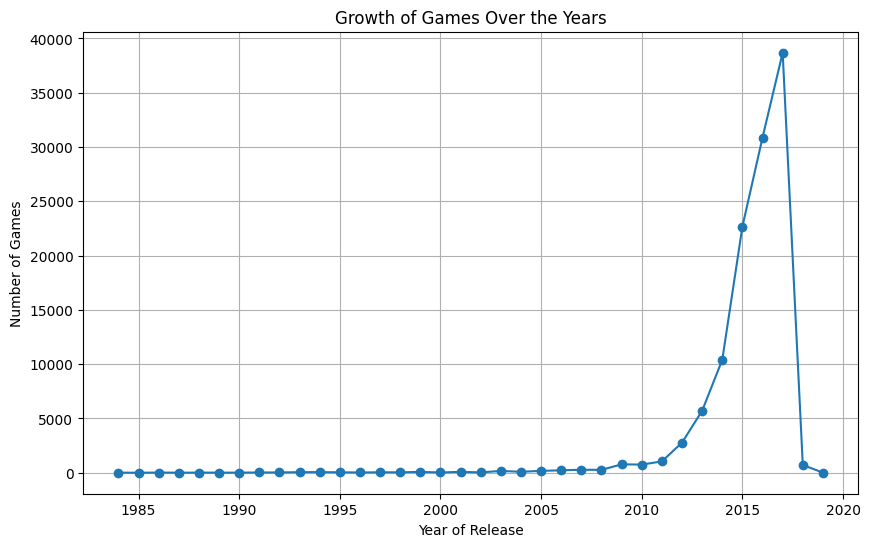

In [370]:
# Group the data by year and count the number of games in each year
yearly_counts = df_EDA_steam['Release_Year'].value_counts().sort_index()
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
# Label and title configuration
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.title('Growth of Games Over the Years')
# Display the plot
plt.grid()
plt.show()

### EDA USER REVIEW ANALYSIS

In [371]:
df_EDA_reviews = pd.read_parquet('ML_data/EDA_user_reviews.gzip')
df_EDA_reviews.head(1)

,User_Id,Item_Id,Recommend,Year,Sentiment_Score
0,76561197970982479,1250,True,2011,2


In [372]:
df_EDA_reviews['Year'].describe()

count    48498.000000
mean      2014.148150
std          0.842611
min       2010.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: Year, dtype: float64

In [373]:
df_EDA_reviews['Sentiment_Score'].info()

<class 'pandas.core.series.Series'>
Index: 48498 entries, 0 to 25780
Series name: Sentiment_Score
Non-Null Count  Dtype
--------------  -----
48498 non-null  int64
dtypes: int64(1)
memory usage: 757.8 KB


In [374]:
# Use value_counts to count the frequency of each unique value in 'sentiment' column
value_counts_sentiment = df_EDA_reviews['Sentiment_Score'].value_counts()
# Print the result
print(value_counts_sentiment)

Sentiment_Score
2    40900
0     7571
1       27
Name: count, dtype: int64


### EDA USER ITEM ANALYSIS

In [375]:
df_EDA_items = pd.read_parquet('ML_data/EDA_user_items.gzip')
df_EDA_items.head(1)

,Item_Id,Item_Name,Playtime_Forever,User_Id
17973,200210,Realm of the Mad God,166.0,--000--


In [376]:
df_EDA_items['Playtime_Forever'].describe()

count    5.094105e+06
mean     9.905511e+02
std      5.414297e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.550000e+02
max      6.427730e+05
Name: Playtime_Forever, dtype: float64

In [377]:
df_EDA_items['Playtime_Forever'].value_counts()

Playtime_Forever
0.0         1847730
1.0          101586
2.0           34391
3.0           31530
4.0           29127
             ...   
28671.0           1
193520.0          1
30500.0           1
39459.0           1
57545.0           1
Name: count, Length: 48861, dtype: int64

In [378]:
# Filter the DataFrame to remove rows where 'Playtime_Forever' is 0
df_EDA_items = df_EDA_items[df_EDA_items['Playtime_Forever'] != 0]
# Display the filtered DataFrame
df_EDA_items

,Item_Id,Item_Name,Playtime_Forever,User_Id
17973,200210,Realm of the Mad God,166.0,--000--
17973,263760,Turbo Dismount,244.0,--000--
17973,233190,Final Exam,193.0,--000--
17973,218620,PAYDAY 2,416.0,--000--
17973,225640,Sacred 2 Gold,5.0,--000--
...,...,...,...,...
54116,17080,Tribes: Ascend,475.0,zzzmidmiss
54116,105430,Age of Empires Online,358.0,zzzmidmiss
54116,113400,APB Reloaded,16.0,zzzmidmiss
54116,200390,Oil Rush,45.0,zzzmidmiss


In [379]:
df_EDA_items['Playtime_Forever'].value_counts()

Playtime_Forever
1.0        101586
2.0         34391
3.0         31530
4.0         29127
5.0         27612
            ...  
23112.0         1
44840.0         1
34509.0         1
89537.0         1
57545.0         1
Name: count, Length: 48860, dtype: int64

In [380]:
# Calculate the first quartile (Q1)
q1 = df_EDA_items['Playtime_Forever'].quantile(0.25)
# Calculate the median (Q2)
q2 = df_EDA_items['Playtime_Forever'].quantile(0.5)
# Calculate the third quartile (Q3)
q3 = df_EDA_items['Playtime_Forever'].quantile(0.75)
# Print the quartile values
print("First quartile (Q1):", q1)
print("Median (Q2):", q2)
print("Third quartile (Q3):", q3)

First quartile (Q1): 44.0
Median (Q2): 205.0
Third quartile (Q3): 808.0


In [381]:
# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = df_EDA_items['Playtime_Forever'].quantile(0.25)
Q3 = df_EDA_items['Playtime_Forever'].quantile(0.75)
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
# Calculate the limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
# Identify the outliers
outliers = df_EDA_items[(df_EDA_items['Playtime_Forever'] < lower_limit) | (df_EDA_items['Playtime_Forever'] > upper_limit)]
# Print the outliers
print("Outlier values:")
print(outliers)
print(outliers['Playtime_Forever'].value_counts())

Outlier values:
      Item_Id                                     Item_Name  Playtime_Forever  \
17973  113400                                  APB Reloaded            2763.0   
17973  339610                 FreeStyle2: Street Basketball            5502.0   
17973  304930                                      Unturned            4037.0   
17973  304050                                         Trove            4260.0   
17973     730              Counter-Strike: Global Offensive          107119.0   
...       ...                                           ...               ...   
18483   42690  Call of Duty: Modern Warfare 3 - Multiplayer            9890.0   
18483  202990      Call of Duty: Black Ops II - Multiplayer           16779.0   
18483     730              Counter-Strike: Global Offensive            9308.0   
18483  110800                                    L.A. Noire            2175.0   
54116   49520                                 Borderlands 2            2156.0   

          U

In [382]:
# Define the desired number of categories or leave it to qcut
num_categories = 5  # You can adjust this value according to your preferences or leave it as None
# Use qcut to automatically create the categories
if num_categories:
    categories = pd.qcut(df_EDA_items['Playtime_Forever'], q=num_categories, labels=False)
else:
    categories = pd.qcut(df_EDA_items['Playtime_Forever'], labels=False)
# Add the categories to the DataFrame
df_EDA_items['playtime_categories'] = categories
# View the resulting DataFrame
df_EDA_items


,Item_Id,Item_Name,Playtime_Forever,User_Id,playtime_categories
17973,200210,Realm of the Mad God,166.0,--000--,2
17973,263760,Turbo Dismount,244.0,--000--,2
17973,233190,Final Exam,193.0,--000--,2
17973,218620,PAYDAY 2,416.0,--000--,3
17973,225640,Sacred 2 Gold,5.0,--000--,0
...,...,...,...,...,...
54116,17080,Tribes: Ascend,475.0,zzzmidmiss,3
54116,105430,Age of Empires Online,358.0,zzzmidmiss,3
54116,113400,APB Reloaded,16.0,zzzmidmiss,0
54116,200390,Oil Rush,45.0,zzzmidmiss,1


In [383]:
# Calculate quantile limits and assign categories
categories, quantile_limits = pd.qcut(df_EDA_items['Playtime_Forever'], q=6, retbins=True, labels=False)

In [384]:
# Find the limits for category 0
lower_limit_0 = quantile_limits[0]
upper_limit_0 = quantile_limits[1]
# Print the limits for category 0
print(f"Lower limit of category 0: {lower_limit_0}")
print(f"Upper limit of category 0: {upper_limit_0}")
# Find the limits for category 1
lower_limit_1 = quantile_limits[1]
upper_limit_1 = quantile_limits[2]
# Print the limits for category 1
print(f"Lower limit of category 1: {lower_limit_1}")
print(f"Upper limit of category 1: {upper_limit_1}")
# Find the limits for category 2
lower_limit_2 = quantile_limits[2]
upper_limit_2 = quantile_limits[3]
# Print the limits for category 2
print(f"Lower limit of category 2: {lower_limit_2}")
print(f"Upper limit of category 2: {upper_limit_2}")
# Find the limits for category 3
lower_limit_3 = quantile_limits[3]
upper_limit_3 = quantile_limits[4]
# Print the limits for category 3
print(f"Lower limit of category 3: {lower_limit_3}")
print(f"Upper limit of category 3: {upper_limit_3}")
# Find the limits for category 4
lower_limit_4 = quantile_limits[4]
upper_limit_4 = quantile_limits[5]
# Print the limits for category 4
print(f"Lower limit of category 4: {lower_limit_4}")
print(f"Upper limit of category 4: {upper_limit_4}")
# Find the limits for category 5
lower_limit_5 = quantile_limits[5]
upper_limit_5 = quantile_limits[6]
# Print the limits for category 5
print(f"Lower limit of category 5: {lower_limit_5}")
print(f"Upper limit of category 5: {upper_limit_5}")

Lower limit of category 0: 1.0
Upper limit of category 0: 22.0
Lower limit of category 1: 22.0
Upper limit of category 1: 78.0
Lower limit of category 2: 78.0
Upper limit of category 2: 205.0
Lower limit of category 3: 205.0
Upper limit of category 3: 494.0
Lower limit of category 4: 494.0
Upper limit of category 4: 1454.0
Lower limit of category 5: 1454.0
Upper limit of category 5: 642773.0


### GENRE TYPES

In [385]:
df_EDA_steam.head(0)

,Id,App_Name,Price,Release_Year,Genres,Early_Access,Specs,Developer,Price_range


In [386]:
df_EDA_steam['Genres'].info()

<class 'pandas.core.series.Series'>
Index: 116160 entries, 88310 to 120443
Series name: Genres
Non-Null Count   Dtype 
--------------   ----- 
116160 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [387]:
df_EDA_steam['Genres'].describe()

count     116160
unique        21
top        indie
freq       24601
Name: Genres, dtype: object

In [388]:
df_EDA_steam['Genres'].value_counts()

Genres
indie                        24601
action                       19308
simulation                   13696
casual                       13447
strategy                     11639
adventure                    10877
rpg                           8427
free to play                  3490
sports                        3195
racing                        2371
early access                  1924
massively multiplayer         1901
design &amp; illustration      424
utilities                      248
web publishing                 222
photo editing                  121
animation &amp; modeling       116
education                       57
software training               40
video production                30
audio production                26
Name: count, dtype: int64

In [389]:
df_EDA_reviews['Recommend'].info()

<class 'pandas.core.series.Series'>
Index: 48498 entries, 0 to 25780
Series name: Recommend
Non-Null Count  Dtype
--------------  -----
48498 non-null  bool 
dtypes: bool(1)
memory usage: 426.3 KB


In [390]:
df_EDA_reviews['Recommend'].describe()

count     48498
unique        2
top        True
freq      43557
Name: Recommend, dtype: object

In [391]:
# Replace 'True' with 1 and 'False' with 0 in the 'recommend' column
df_EDA_reviews['Recommend'] = df_EDA_reviews['Recommend'].replace({True: 1, False: 0})

In [392]:
df_EDA_steam = df_EDA_steam [['Id', 'App_Name', 'Price_range', 'Release_Year', 'Genres']]
df_EDA_steam

,Id,App_Name,Price_range,Release_Year,Genres
88310,761140,Lost Summoner Kitty,2,2018,action
88310,761140,Lost Summoner Kitty,2,2018,casual
88310,761140,Lost Summoner Kitty,2,2018,indie
88310,761140,Lost Summoner Kitty,2,2018,simulation
88310,761140,Lost Summoner Kitty,2,2018,strategy
...,...,...,...,...,...
120443,658870,Exit Directions,2,2017,casual
120443,658870,Exit Directions,2,2017,casual
120443,658870,Exit Directions,2,2017,indie
120443,658870,Exit Directions,2,2017,indie


In [393]:
df_EDA_steam.to_parquet('ML_data/ML_steam_EDA.gzip')

In [394]:
# Selecting specific columns from df_EDA_reviews dataframe
df_EDA_reviews_for_ML = df_EDA_reviews[['User_Id', 'Item_Id', 'Recommend', 'Sentiment_Score']]
# Define new column names
new_column_names = {
    'item_id': 'id',
}
# Rename columns using the 'rename' method
df_EDA_reviews_for_ML = df_EDA_reviews_for_ML.rename(columns=new_column_names)
df_EDA_reviews_for_ML

,User_Id,Item_Id,Recommend,Sentiment_Score
0,76561197970982479,1250,1,2
0,76561197970982479,22200,1,2
0,76561197970982479,43110,1,2
1,js41637,251610,1,2
1,js41637,227300,1,2
...,...,...,...,...
25764,wayfeng,730,1,2
25765,76561198251004808,253980,1,2
25769,72947282842,730,1,0
25771,ApxLGhost,730,1,2


In [395]:
df_EDA_reviews_for_ML.to_parquet('ML_data/ML_reviews_EDA.gzip')

In [396]:
# Selecting specific columns from df_EDA_items dataframe
df_EDA_items_for_ML = df_EDA_items[['Item_Id', 'Item_Name', 'User_Id', 'playtime_categories']]
# Rename the 'item_id' column to 'id'
df_EDA_items_for_ML['Id'] = df_EDA_items_for_ML['Item_Id']
# Drop the original 'item_id' column
df_EDA_items_for_ML = df_EDA_items_for_ML.drop('Item_Id', axis=1)
# Save the dataframe to a CSV file
df_EDA_items_for_ML.to_parquet('ML_data/ML_user_items_EDA.gzip', index=False)
